#### As people become more educated are they more or less likely to be married?

Growing up as the daughter of a single mom, I was keenly aware of how my life differed from those of my classmates whose parents were still married. My mom worked full-time, picked me up from daycare and then went to college at night. She did this for most of my childhood. In fact, my mom finally graduated with her bachelor's degree the week before my older sister graduated from college with hers. 

With this in mind, let's examine the relationships between education levels, marital status, and income. 

In [1]:
# Import necessary libraries and packages

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore') #Removes deprecation warnings
import os

I chose Kaggle's Adult Income dataset (from 1996 US Census) because it requires little to no cleaning allowing me to dive right into the point of the assignment which is to craft a story from a dataset. I'll begin by exploring and tidying up the data.

In [2]:
# Read the adult.csv file into a dataframe
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df.shape

(48842, 15)

In [4]:
columns_to_drop = ['workclass','fnlwgt','occupation','relationship','race','gender','capital-gain','capital-loss', 'native-country']

df = df.drop(columns = columns_to_drop)
df.head()

,age,education,educational-num,marital-status,hours-per-week,income
0,25,11th,7,Never-married,40,<=50K
1,38,HS-grad,9,Married-civ-spouse,50,<=50K
2,28,Assoc-acdm,12,Married-civ-spouse,40,>50K
3,44,Some-college,10,Married-civ-spouse,40,>50K
4,18,Some-college,10,Never-married,30,<=50K


In [5]:
df.dtypes

age                 int64
education          object
educational-num     int64
marital-status     object
hours-per-week      int64
income             object
dtype: object

In [6]:
df.describe()

,age,educational-num,hours-per-week
count,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,40.422382
std,13.710510,2.570973,12.391444
min,17.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,48.000000,12.000000,45.000000
max,90.000000,16.000000,99.000000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'educational-num'}>],
       [<AxesSubplot:title={'center':'hours-per-week'}>, <AxesSubplot:>]],
      dtype=object)

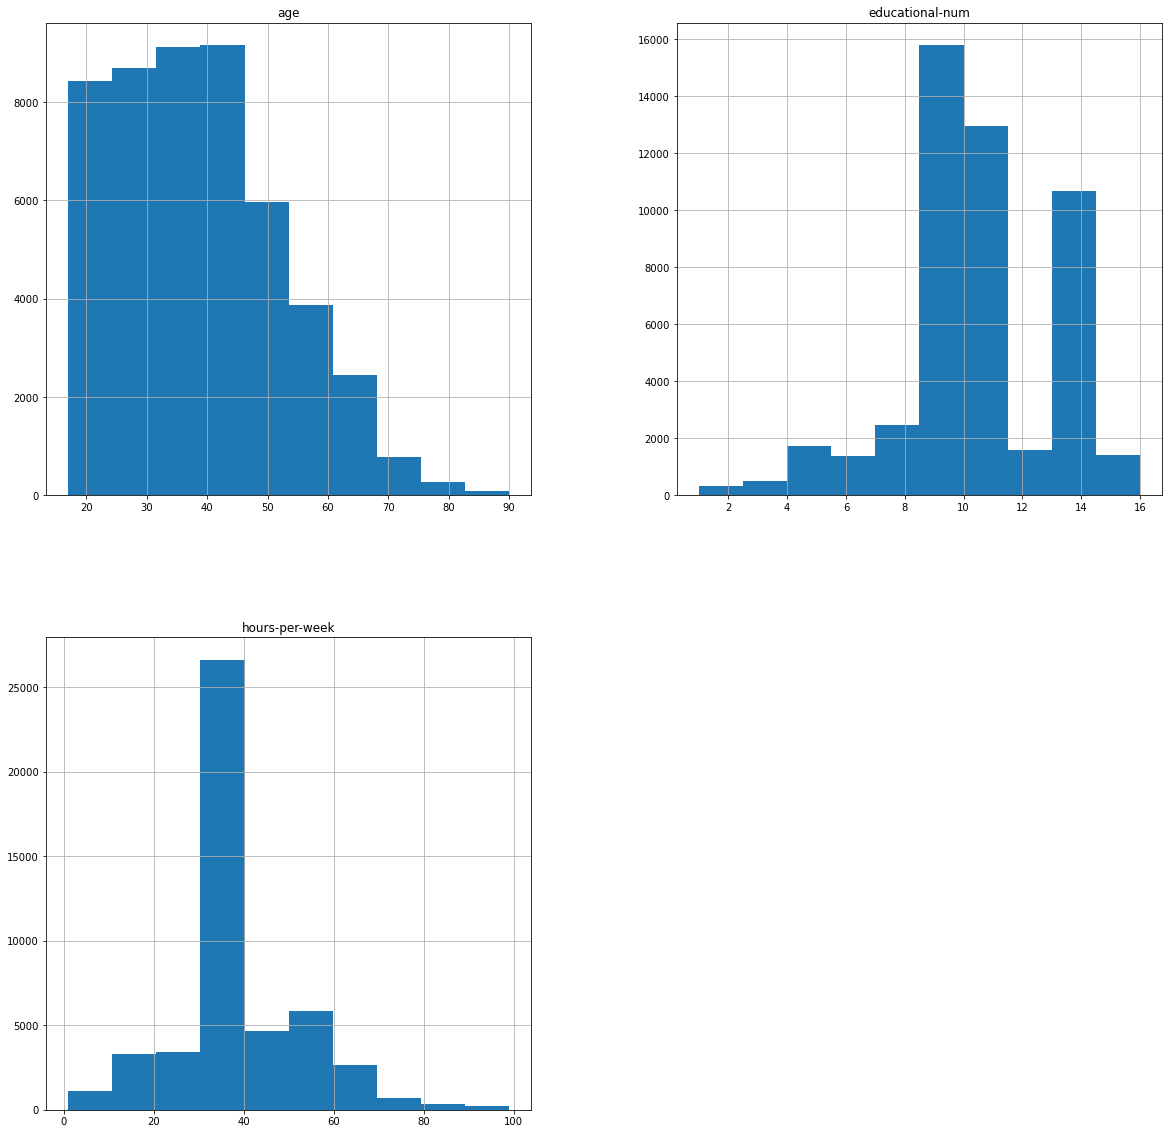

In [7]:
df.hist(figsize=(20,20))

In [8]:
df.education.value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [9]:
df.rename(columns={'marital-status': 'marital_status'}, inplace=True)
df.marital_status.value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital_status, dtype: int64

In [10]:
# Simplify the 'Marital_status' column values to make visualizations cleaner
# Create a dictionary to define the replacements
marital_status_mapping = {
    'Married-civ-spouse': 'Married',
    'Married-spouse-absent': 'Married',
    'Married-AF-spouse': 'Married'
}

# Use the replace method to apply the replacements
df['marital_status'] = df['marital_status'].replace(marital_status_mapping)

df.marital_status.value_counts()

Married          23044
Never-married    16117
Divorced          6633
Separated         1530
Widowed           1518
Name: marital_status, dtype: int64

#### The data is ready to begin visualizations.
Let's start with a heatmap to explore the relationship between education level and marital status. We'll filter for education levels at the high school level or higher.

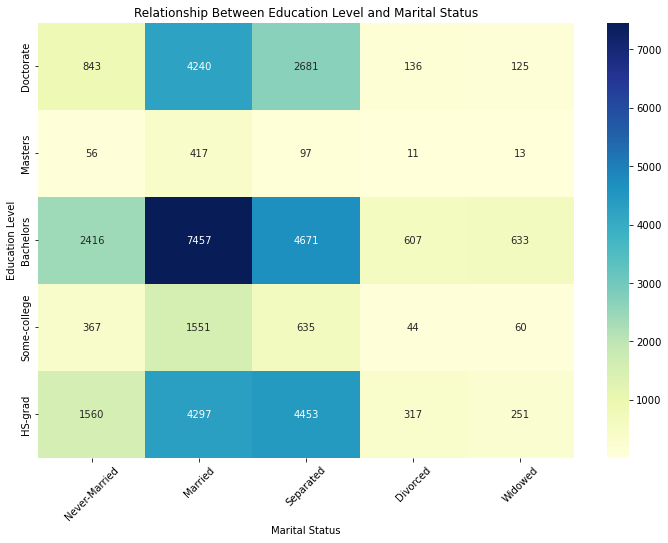

In [11]:
# Exploring the relationship between education level and marital status

# Filter the dataset for education level greater than or equal to 'HS-grad'
filtered_data = df[df['education'].isin(['HS-grad', 'Some-college', 'Bachelors', 'Masters', 'Doctorate'])]

contingency_table = pd.crosstab(filtered_data['education'], filtered_data['marital_status'])

# Specifying order to make relationships clearer. The default is alphbetical which isn't helpful in this case
x_order = ['Never-Married', 'Married', 'Separated', 'Divorced', 'Widowed']
y_order = ['Doctorate','Masters','Bachelors','Some-college','HS-grad']

plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu', xticklabels=x_order, yticklabels=y_order)
plt.xlabel('Marital Status')
plt.ylabel('Education Level')
plt.title('Relationship Between Education Level and Marital Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


#### Looks like there is definitely a strong correlation between marriage and having a bachelor's degree. 
It's often tricky to judge color intensity of a heatmap. So, let's examine a stacked column chart to further explore these relationships. 

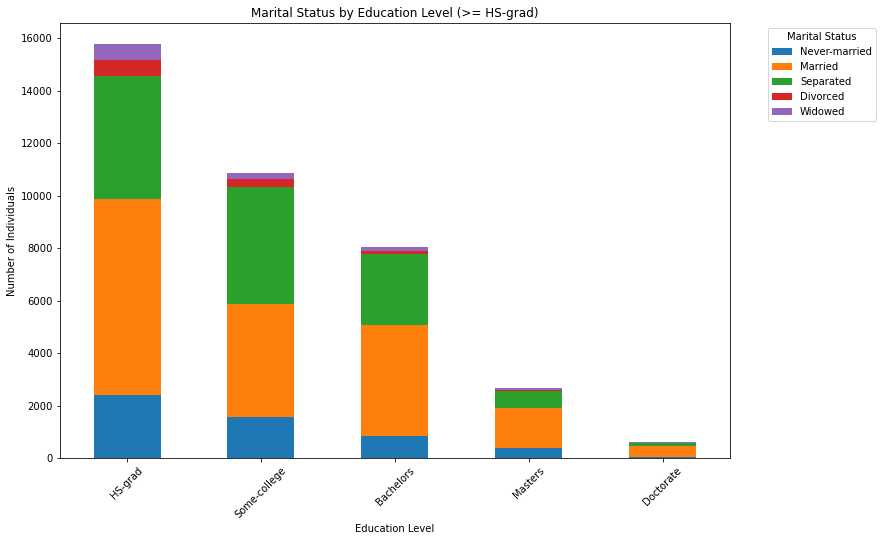

In [12]:
# Creating stacked column chart to explore further the relationship between education levels and marital status

# Define the desired order of education levels 
education_order = ['HS-grad', 'Some-college', 'Bachelors', 'Masters', 'Doctorate']

# Define the desired order of marital statuses for the legend
marital_status_order = ['Never-married', 'Married', 'Separated', 'Divorced', 'Widowed']

# Filter the dataset for education level greater than or equal to 'HS-grad'
filtered_data = df[df['education'].isin(education_order)]


# Create a contingency table for marital status and education
contingency_table = pd.crosstab(filtered_data['education'], filtered_data['marital_status'])

# Reorder the rows based on the specified education_order
contingency_table = contingency_table.reindex(education_order)

# Plot the stacked bar chart with percentages
ax = contingency_table.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.xlabel('Education Level')
plt.ylabel('Number of Individuals')
plt.title('Marital Status by Education Level (>= HS-grad)')

# Customize the legend order
handles, labels = ax.get_legend_handles_labels()
handles = [handles[marital_status_order.index(label)] for label in marital_status_order]
labels = marital_status_order

# Create a new legend with the desired order
ax.legend(handles, labels, title='Marital Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45)
plt.show()


####  As education level increases, the number of individuals decreases. 
In fact, there are far more high school graduates than doctorates which makes it difficult to evaluate them on the same chart. Let's look more closely at the data by examining at a couple tables.

In [13]:

# Define the desired order of education levels and marital statuses
education_order = ['HS-grad', 'Some-college', 'Bachelors', 'Masters', 'Doctorate']
marital_status_order = ['Never-married', 'Married', 'Separated', 'Divorced', 'Widowed']

# Filter the dataset for education level greater than or equal to 'HS-grad'
filtered_data = df[df['education'].isin(education_order)]

# Combine specific marital statuses into a new category 'Married'
married_statuses = ['Married-civ-spouse', 'Married-AF-spouse', 'Married-spouse-absent']
filtered_data['marital_status'] = filtered_data['marital_status'].replace(married_statuses, 'Married')

# Create a contingency table for marital status and education
contingency_table = pd.crosstab(filtered_data['marital_status'],filtered_data['education'])

# Reorder the rows and columns based on the specified order
contingency_table = contingency_table.reindex(index=marital_status_order, columns=education_order)

# Calculate the row-wise percentages (percentage of each education level within each marital status)
percentage_table = (contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100).round(2)

# Display the rounded percentage table
print(percentage_table)


education       HS-grad  Some-college  Bachelors  Masters  Doctorate
marital_status                                                      
Never-married     37.26         35.52      21.38     5.07       0.77
Married           41.52         23.92      23.61     8.63       2.32
Separated         54.44         28.43      12.20     3.95       0.99
Divorced          46.09         29.76      16.08     7.00       1.07
Widowed           58.50         23.20      11.55     5.55       1.20


#### The above table shows the percentage of each education level within each marital status. 
We see again that there are far more individuals in the high school graduate column as compared to doctorate. 
#### In the table below, let's also explore the percentage of each marital status within each education level. 
Seeing the data explored in this way is helpful especially for the higher education levels. For example, in the previous table and chart, the doctorate column was so much smaller than high school graduate column that we couldn't really see a relationship within the doctorate column. With this new table, we see that 70% of doctorates are married!

In [14]:

# Define the desired order of education levels and marital statuses
education_order = ['HS-grad', 'Some-college', 'Bachelors', 'Masters', 'Doctorate']
marital_status_order = ['Never-married', 'Married', 'Separated', 'Divorced', 'Widowed']

# Filter the dataset for education level greater than or equal to 'HS-grad'
filtered_data = df[df['education'].isin(education_order)]

# Combine specific marital statuses into a new category 'Married'
married_statuses = ['Married-civ-spouse', 'Married-AF-spouse', 'Married-spouse-absent']
filtered_data['marital_status'] = filtered_data['marital_status'].replace(married_statuses, 'Married')

# Create a contingency table for marital status and education
contingency_table = pd.crosstab(filtered_data['marital_status'],filtered_data['education'])

# Reorder the rows and columns based on the specified order
contingency_table = contingency_table.reindex(index=marital_status_order, columns=education_order)

# Calculate the column-wise percentages (percentage of each marital status within each education level)
percentage_table = (contingency_table.div(contingency_table.sum(axis=0), axis=1) * 100).round(2)

# Display the rounded percentage table
print(percentage_table)


education       HS-grad  Some-college  Bachelors  Masters  Doctorate
marital_status                                                      
Never-married     29.59         40.94      33.41    23.90      16.33
Married           47.24         39.50      52.83    58.37      70.20
Separated          3.85          2.91       1.69     1.66       1.85
Divorced          15.31         14.34      10.50    13.81       9.43
Widowed            4.01          2.31       1.56     2.26       2.19


#### Now that we've explored marital status and education levels, I wonder how income impacts these relationships.
Let's add income to our analysis by breaking down marital status by education level and income.

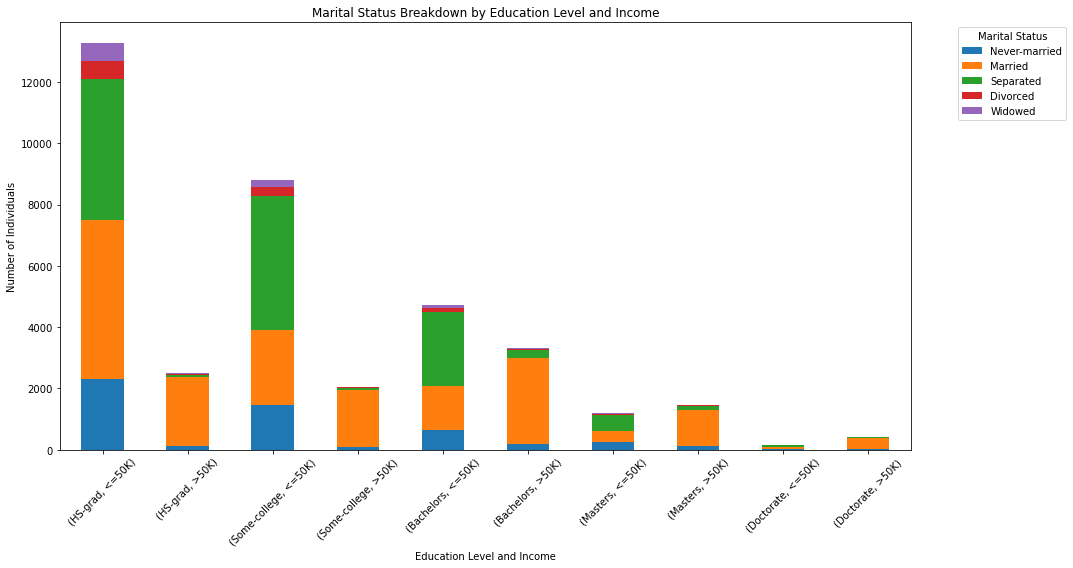

In [15]:

# Define the desired order of education levels
education_order = ['HS-grad', 'Some-college', 'Bachelors', 'Masters', 'Doctorate']

# Define the desired order of marital statuses for the legend
marital_status_order = ['Never-married', 'Married', 'Separated', 'Divorced', 'Widowed']

# Filter the dataset for desired education levels
filtered_data = df[df['education'].isin(education_order)]

# Create a multi-level contingency table for income, marital status, and education
contingency_table = pd.crosstab([filtered_data['education'], filtered_data['income']], filtered_data['marital_status'])

# Reorder the rows based on the specified education_order and income categories
multi_index_order = [(edu, income) for edu in education_order for income in ['<=50K', '>50K']]
contingency_table = contingency_table.reindex(multi_index_order)

# Plot the grouped bar chart
ax = contingency_table.plot(kind='bar', stacked=True, figsize=(15, 8))

plt.xlabel('Education Level and Income')
plt.ylabel('Number of Individuals')
plt.title('Marital Status Breakdown by Education Level and Income')

# Customize the legend
handles, labels = ax.get_legend_handles_labels()
ordered_handles = [handles[marital_status_order.index(label)] if label in marital_status_order else handles[-1] for label in marital_status_order]
ordered_labels = marital_status_order

# Create a new legend with the desired order
ax.legend(ordered_handles, ordered_labels, title='Marital Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### The scale between income less than or equal to 50K and those that are greater than 50K is vast.
This makes it very difficult to see what's happening. Let's break this chart into two.

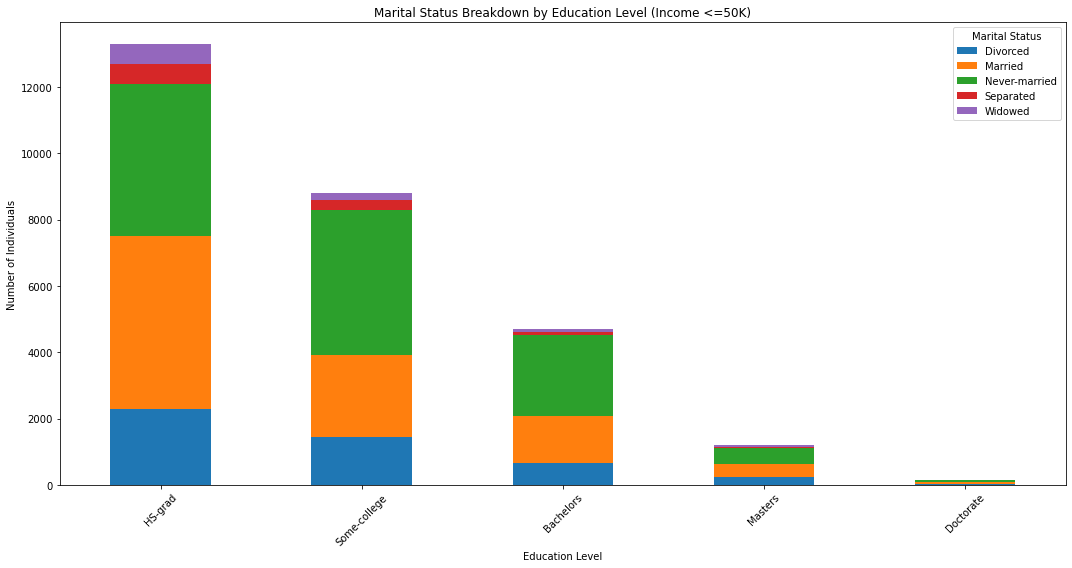

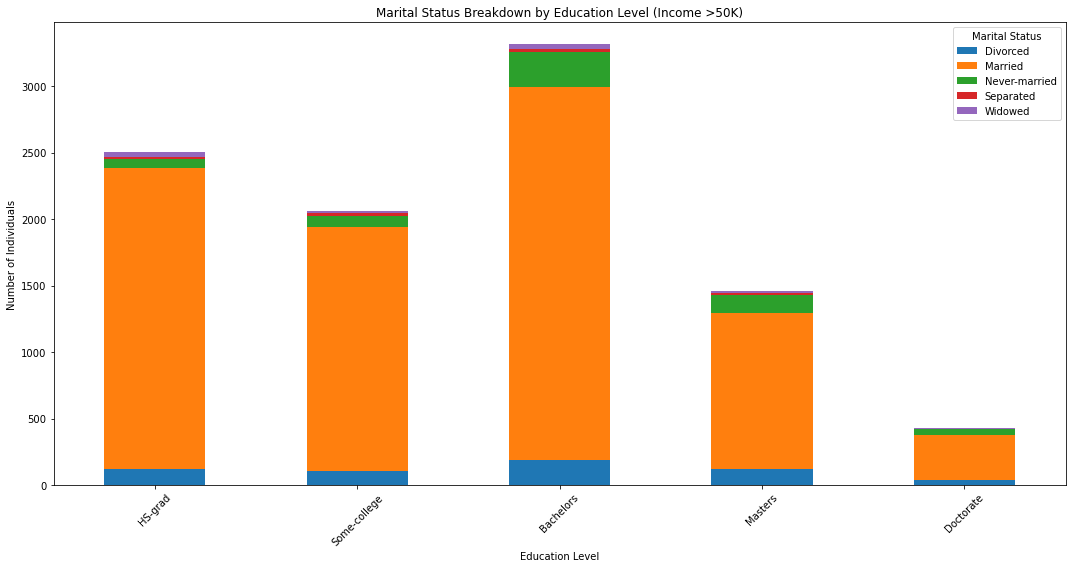

In [16]:

# Define the desired order of education levels
education_order = ['HS-grad', 'Some-college', 'Bachelors', 'Masters', 'Doctorate']

# Define the desired order of marital statuses for the legend
marital_status_order = ['Never-married', 'Married', 'Separated', 'Divorced', 'Widowed']

# Filter the dataset for desired education levels
filtered_data = df[df['education'].isin(education_order)]

# Create a multi-level contingency table for income, marital status, and education
contingency_table = pd.crosstab([filtered_data['education'], filtered_data['income']], filtered_data['marital_status'])

# Separate the contingency table into two parts: <=50K and >50K
contingency_50k_or_less = contingency_table.xs('<=50K', level='income').reindex(education_order)
contingency_more_than_50k = contingency_table.xs('>50K', level='income').reindex(education_order)

# Plot the two separate column charts

# Chart for Income <=50K
ax1 = contingency_50k_or_less.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Marital Status Breakdown by Education Level (Income <=50K)')
plt.ylabel('Number of Individuals')
plt.xlabel('Education Level')
plt.legend(title='Marital Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Chart for Income >50K
ax2 = contingency_more_than_50k.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Marital Status Breakdown by Education Level (Income >50K)')
plt.ylabel('Number of Individuals')
plt.xlabel('Education Level')
plt.legend(title='Marital Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### People making more than 50K are overwhelmingly married regardless of education level. In contrast, for those earning less than 50K, the higher the education the more likely they are to not be married.
Since the data set is from 1996, I think it's helpful to consider how much money 50K would be today. I used a couple amortization calculators and it turns out that it would be worth almost 97K today!

#### Let's see what percentage of individuals earn more or less than 50K.

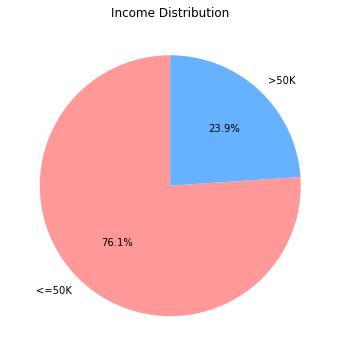

In [17]:
# Group by 'income' and count the number of occurrences of each category
income_counts = df['income'].value_counts()

# Plot pie chart
plt.figure(figsize=(10, 6))
income_counts.plot.pie(autopct='%1.1f%%', startangle=90, labels=income_counts.index, colors=['#FF9999', '#66B2FF'])

# Remove y-axis label
plt.ylabel('')

# Set title
plt.title('Income Distribution')

# Show pie chart
plt.show()


#### More than 75% of the individuals earn 50K or less.
Income seems to have the strongest impact on marital status especially when considering that less than 25% of individuals earned more than 50K. That means that the column chart for the less than 50K group represents more than 75% of individuals. In that chart many more people never married.
#### Turns out that the wealthier someone is, the more likely they are to marry regardless of education level.
I'm curious if individuals don't marry because weddings themselves can be expensive. They can be done inexpensively though, so it seems like there's more to the story. There are tax benefits and health insurance benefits to marriage in the United States. So it would seem that people would want to take advantage of that status for financial reasons at every income level. There are also numerous studies that show having a lifetime companion increases longevity and general health.